# VAE

In [6]:
from model import VAE

import tensorflow as tf
import keras as K
import numpy as np
import os

### Data Preprocessing

In [4]:
(x_train, _), (x_test, _) = K.datasets.mnist.load_data()
mnist_digits = np.concatenate([x_train, x_test], axis=0)
mnist_digits = tf.cast(mnist_digits, tf.float64) / 255.0
mnist_digits = np.expand_dims(mnist_digits, -1)

### Training the VAE

In [5]:
vae = VAE(image_size=28, channels=1, latent_dim=2)
vae.compile(optimizer=K.optimizers.Adam())
callbacks = vae.get_callbacks(log_dir="logs", patience=7)
vae.fit(mnist_digits, epochs=30, batch_size=256, callbacks=callbacks)

Epoch 1/30


I0000 00:00:1759026412.678438   11205 service.cc:148] XLA service 0x72a408012890 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1759026412.678466   11205 service.cc:156]   StreamExecutor device (0): Tesla V100-SXM2-16GB, Compute Capability 7.0
2025-09-28 02:26:52.743897: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1759026413.080079   11205 cuda_dnn.cc:529] Loaded cuDNN version 90300


 14/274 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - kl_loss: 0.0043 - loss: 531.0336 - reconstruction_loss: 531.0292    

I0000 00:00:1759026415.643055   11205 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


274/274 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - kl_loss: 1.3247 - loss: 230.7587 - reconstruction_loss: 229.4340
Epoch 2/30
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - kl_loss: 3.9384 - loss: 178.1150 - reconstruction_loss: 174.1768
Epoch 3/30
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - kl_loss: 4.7650 - loss: 167.0777 - reconstruction_loss: 162.3127
Epoch 4/30
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - kl_loss: 5.3026 - loss: 159.7341 - reconstruction_loss: 154.4315
Epoch 5/30
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - kl_loss: 5.5282 - loss: 156.3292 - reconstruction_loss: 150.8009
Epoch 6/30
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - kl_loss: 5.6917 - loss: 154.3318 - reconstruction_loss: 148.6401
Epoch 7/30
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - kl_loss: 5.7763 - loss: 153.0894 - reconstruction_loss: 147.3130
Epoch 8/30
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - kl_loss: 5.8587 - loss: 152.1120 - reconstruction_loss: 146.2534
Epoch 9/30
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step 

In [6]:
for metric in vae.metrics:
    print(f"{metric.name}: {metric.result().numpy()}")

total_loss: 145.10171508789062
reconstruction_loss: 138.78346252441406
kl_loss: 6.3182854652404785


Esto da diferente estoy usando un device M3 (a través de Metal Performance Shaders) que en tiene un comportamiento numérico diferente a CUDA. De hecho tuve usar un clip en el kl_loss para evitar explosiones numéricas.

In [7]:
# Save
os.makedirs("./weights", exist_ok=True)
vae.encoder.save("./weights/encoder.keras")
vae.decoder.save("./weights/decoder.keras")

### View Results

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


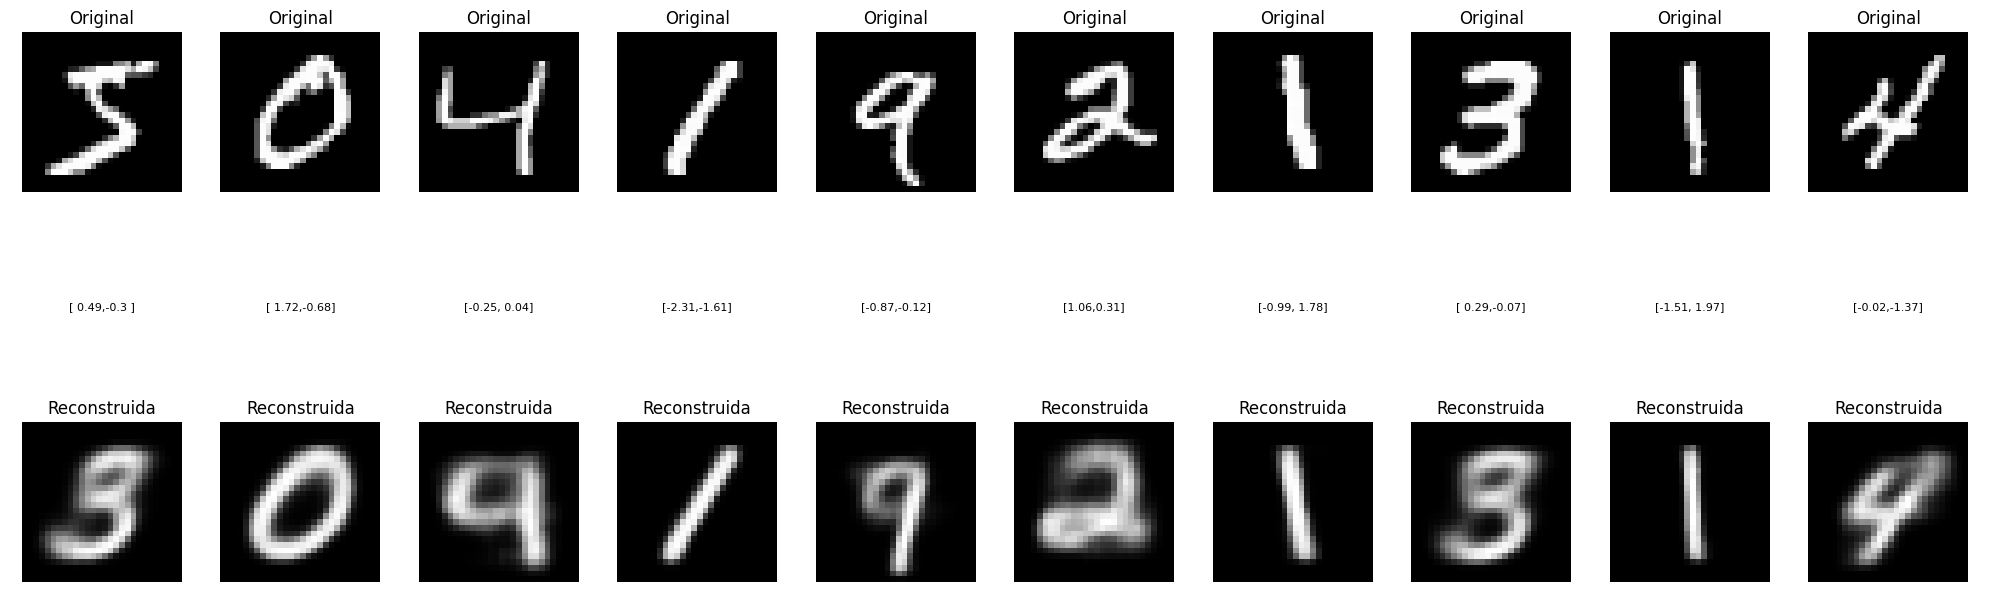

In [8]:
import matplotlib.pyplot as plt

n = 10
example_images = mnist_digits[:n]

# Obtener la representación latente z y las reconstrucciones
z_mean, z_log_var, z = vae.encoder.predict(example_images)
predictions = vae.decoder.predict(z)

plt.figure(figsize=(20, 6))

for i in range(n):
    # Imagen original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(example_images[i].squeeze(), cmap="gray")
    plt.title("Original")
    plt.axis("off")

    # Vector latente z (como texto en una celda)
    ax = plt.subplot(3, n, i + 1 + n)
    ax.axis("off")
    z_text = np.array2string(z[i], precision=2, separator=",")
    ax.text(0.5, 0.5, z_text, ha="center", va="center", fontsize=8)

    # Reconstrucción
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(predictions[i].squeeze(), cmap="gray")
    plt.title("Reconstruida")
    plt.axis("off")

plt.tight_layout()
plt.show()


## Fahion MNIST

In [11]:
(x_train, _), (x_test, _) = K.datasets.fashion_mnist.load_data()
fmnist_digits = np.concatenate([x_train, x_test], axis=0)
fmnist_digits = tf.cast(fmnist_digits, tf.float64) / 255.0
fmnist_digits = np.expand_dims(fmnist_digits, -1)

fvae = VAE(image_size=28, channels=1, latent_dim=32)
fvae.compile(optimizer=K.optimizers.Adam())
callbacks = fvae.get_callbacks(log_dir="logs", patience=7)
fvae.fit(fmnist_digits, epochs=30, batch_size=256, callbacks=callbacks)

Epoch 1/30
274/274 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - kl_loss: 9.9106 - loss: 339.6341 - reconstruction_loss: 329.7236
Epoch 2/30
274/274 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - kl_loss: 18.3038 - loss: 295.3829 - reconstruction_loss: 277.0792
Epoch 3/30
274/274 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - kl_loss: 17.1059 - loss: 281.9131 - reconstruction_loss: 264.8072
Epoch 4/30
274/274 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - kl_loss: 76.0558 - loss: 357.3029 - reconstruction_loss: 281.2472
Epoch 5/30
274/274 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - kl_loss: 212.4624 - loss: 530.1310 - reconstruction_loss: 317.6687
Epoch 6/30
274/274 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - kl_loss: 356.1993 - loss: 714.9300 - reconstruction_loss: 358.7303
Epoch 7/30
274/274 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - kl_loss: nan - loss: nan - reconstruction_loss: nan
Epoch 8/30
274/274 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - kl_loss: nan - loss: nan - reconstruction_loss: nan
Epoch 9/30
274/274 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - kl_l

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


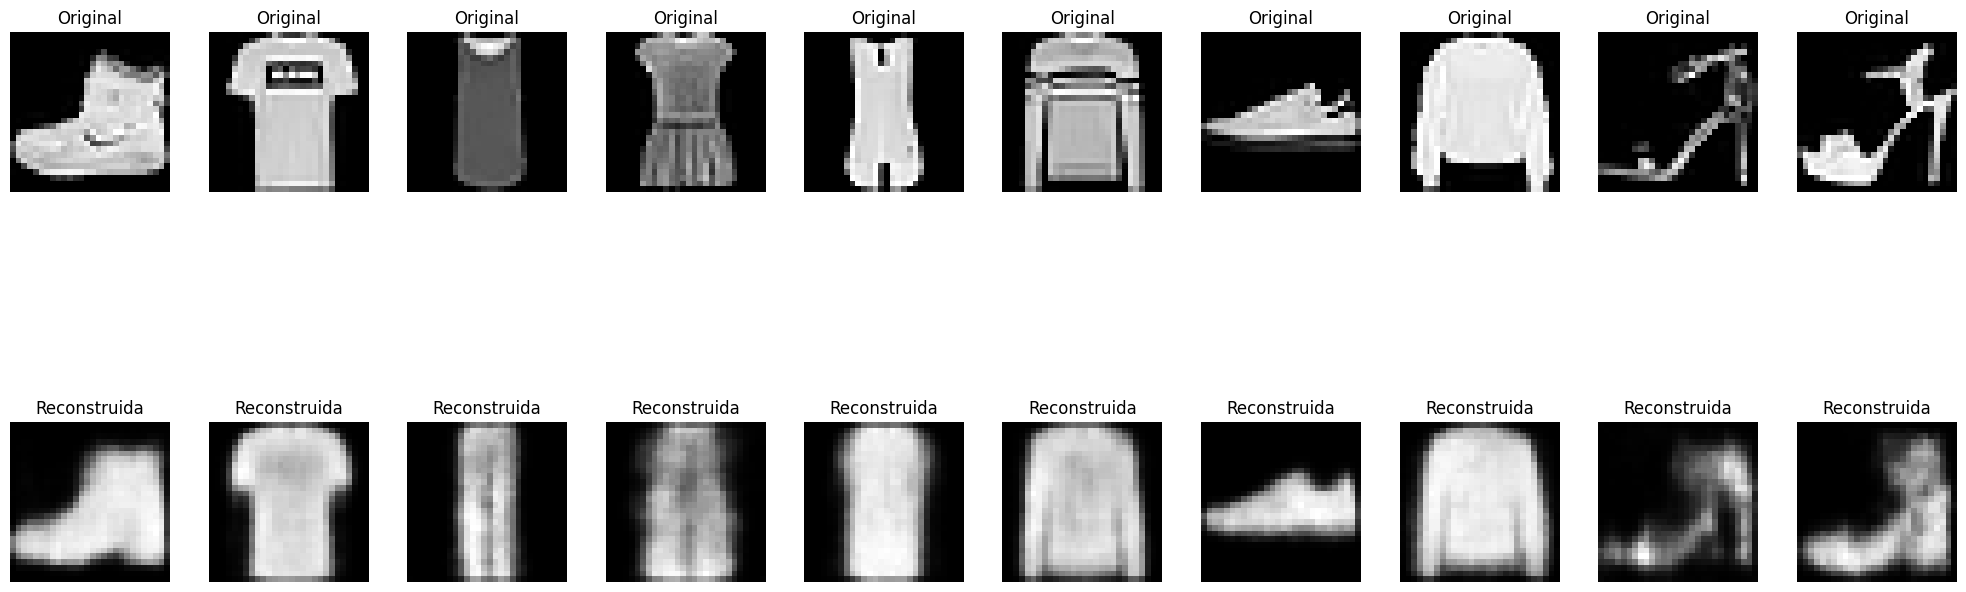

In [15]:
import matplotlib.pyplot as plt

n = 10
example_images = fmnist_digits[:n]

# Obtener la representación latente z y las reconstrucciones
z_mean, z_log_var, z = fvae.encoder.predict(example_images)
predictions = fvae.decoder.predict(z)

plt.figure(figsize=(20, 6))

for i in range(n):
    # Imagen original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(example_images[i].squeeze(), cmap="gray")
    plt.title("Original")
    plt.axis("off")

    # Vector latente z (como texto en una celda)
    #ax = plt.subplot(3, n, i + 1 + n)
    #ax.axis("off")
    #z_text = np.array2string(z[i], precision=2, separator=",")
    #ax.text(0.5, 0.5, z_text, ha="center", va="center", fontsize=8)

    # Reconstrucción
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(predictions[i].squeeze(), cmap="gray")
    plt.title("Reconstruida")
    plt.axis("off")

plt.tight_layout()
plt.show()

## CelebA Dataset

In [9]:
# Import TFDS to download CelebA

import tensorflow_datasets as tfds

# Automatic download
#celeb_a_builder = tfds.builder("celeb_a", version='2.1.0')
#celeb_a_builder.download_and_prepare()

# If downloading manually
celeb_a_builder = tfds.builder("celeb_a", version='2.1.0')
celeb_a_builder.download_and_prepare(download_config=tfds.download.DownloadConfig(manual_dir="../datasets/"))

In [10]:
# Cargar splits de train y test
celeb_a_train = celeb_a_builder.as_dataset(split='train', shuffle_files=True)
celeb_a_test = celeb_a_builder.as_dataset(split='test', shuffle_files=True)

In [11]:
def preprocess_celeba(example):
    image = tf.cast(example['image'], tf.float64) / 255.0
    image = tf.image.resize(image, [64, 64])
    return image

batch_size = 256

celeb_a_train_batched = celeb_a_train.map(preprocess_celeba, num_parallel_calls=tf.data.AUTOTUNE).batch(batch_size).prefetch(tf.data.AUTOTUNE)
celeb_a_test_batched = celeb_a_test.map(preprocess_celeba, num_parallel_calls=tf.data.AUTOTUNE).batch(batch_size).prefetch(tf.data.AUTOTUNE)


In [12]:

vae2 = VAE(image_size=64, channels=3, latent_dim=256)

# Debemos reemplazar el decoder para que produzca imágenes de 64x64x3
latent_inputs = K.layers.Input(shape=(vae2.latent_dim,))
x = K.layers.Dense(8 * 8 * 64, activation="relu")(latent_inputs)
x = K.layers.Reshape((8, 8, 64))(x)
x = K.layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)  # 16x16
x = K.layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)  # 32x32
x = K.layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)  # 64x64
decoder_outputs = K.layers.Conv2DTranspose(3, 3, activation="sigmoid", padding="same")(x)
custom_decoder = K.Model(latent_inputs, decoder_outputs, name="decoder")

vae2 = VAE(image_size=64, channels=3, latent_dim=256, decoder=custom_decoder)
vae2.compile(optimizer=K.optimizers.Adam())
callbacks2 = vae2.get_callbacks(log_dir="logs", patience=3)
vae2.fit(celeb_a_train_batched, epochs=50, callbacks=callbacks2)

Epoch 1/50


2025-09-28 02:28:25.446981: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:376] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608


636/636 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - kl_loss: 11.7288 - loss: 2532.5107 - reconstruction_loss: 2520.7783
Epoch 2/50
636/636 ━━━━━━━━━━━━━━━━━━━━ 28s 43ms/step - kl_loss: 11.1211 - loss: 2485.8677 - reconstruction_loss: 2474.7463
Epoch 3/50
636/636 ━━━━━━━━━━━━━━━━━━━━ 28s 43ms/step - kl_loss: 7.9399 - loss: 2477.0151 - reconstruction_loss: 2469.0740
Epoch 4/50
636/636 ━━━━━━━━━━━━━━━━━━━━ 28s 43ms/step - kl_loss: 5.3995 - loss: 2471.9634 - reconstruction_loss: 2466.5635
Epoch 5/50
636/636 ━━━━━━━━━━━━━━━━━━━━ 28s 43ms/step - kl_loss: 4.5258 - loss: 2469.9341 - reconstruction_loss: 2465.4077
Epoch 6/50
636/636 ━━━━━━━━━━━━━━━━━━━━ 28s 43ms/step - kl_loss: 4.2278 - loss: 2468.8472 - reconstruction_loss: 2464.6194
Epoch 7/50
636/636 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - kl_loss: 4.0974 - loss: 2468.2727 - reconstruction_loss: 2464.1733
Epoch 8/50
636/636 ━━━━━━━━━━━━━━━━━━━━ 27s 42ms/step - kl_loss: 4.0099 - loss: 2467.7556 - reconstruction_loss: 2463.7466
Epoch 9/50
636/636 ━━━━━━

In [13]:
for metric in vae2.metrics:
    print(f"{metric.name}: {metric.result().numpy()}")

total_loss: 2464.858642578125
reconstruction_loss: 2461.343994140625
kl_loss: 3.5135605335235596


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 957ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


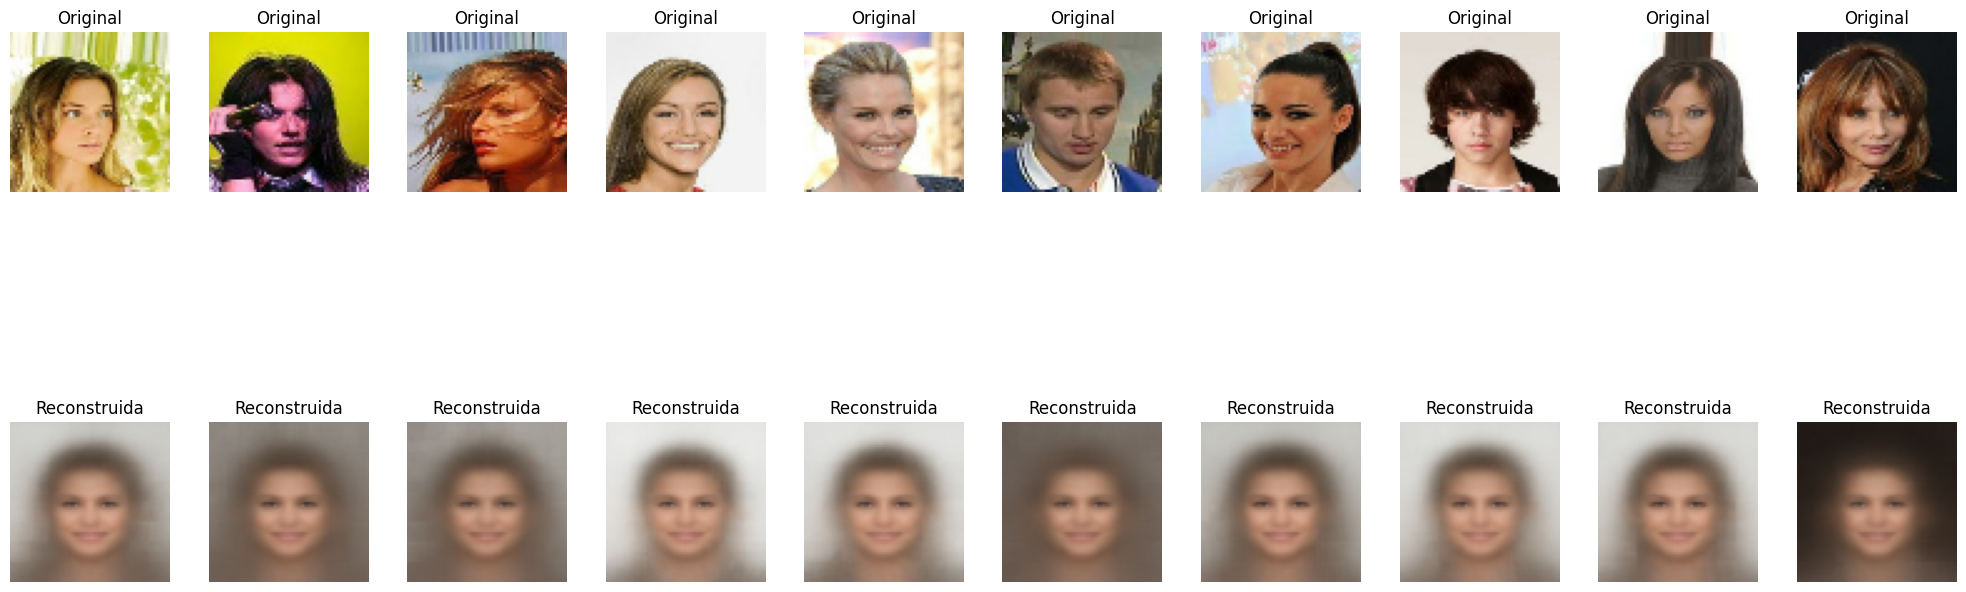

In [14]:
import matplotlib.pyplot as plt

n = 10
images_list = []
for batch in celeb_a_test_batched:
    for img in batch:
        images_list.append(img.numpy())
        if len(images_list) == n:
            break
    if len(images_list) == n:
        break
images = np.stack(images_list)  # shape (n, 64, 64, 3)

# Obtener la representación latente z y las reconstrucciones
z_mean, z_log_var, z = vae2.encoder.predict(images)
predictions = vae2.decoder.predict(z)

plt.figure(figsize=(20, 6))

for i in range(n):
    # Imagen original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(images[i].squeeze())
    plt.title("Original")
    plt.axis("off")

    # Reconstrucción
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(predictions[i].squeeze())
    plt.title("Reconstruida")
    plt.axis("off")

plt.tight_layout()
plt.show()


# CIFAR-10

In [7]:
(x_train, _), (x_test, _) = K.datasets.cifar10.load_data()
cifar_images = np.concatenate([x_train, x_test], axis=0)
cifar_images = tf.cast(cifar_images, tf.float64) / 255.0

In [8]:
vae3 = VAE(image_size=32, channels=3, latent_dim=256)

# Debemos reemplazar el decoder para que produzca imágenes de 32x32x3
latent_inputs = K.layers.Input(shape=(vae3.latent_dim,))
x = K.layers.Dense(8 * 8 * 64, activation="relu")(latent_inputs)
x = K.layers.Reshape((8, 8, 64))(x)
x = K.layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)  # 16x16
x = K.layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)  # 32x32
x = K.layers.Conv2DTranspose(16, 3, activation="relu", padding="same")(x)  # 32x32
decoder_outputs = K.layers.Conv2DTranspose(3, 3, activation="sigmoid", padding="same")(x)
decoder_outputs = K.layers.Conv2DTranspose(3, 3, activation="sigmoid", padding="same")(x)
custom_decoder = K.Model(latent_inputs, decoder_outputs, name="decoder")

vae3 = VAE(image_size=32, channels=3, latent_dim=256, decoder=custom_decoder)
vae3.compile(optimizer=K.optimizers.Adam(1e-4))
callbacks3 = vae3.get_callbacks(log_dir="logs", patience=20)
vae3.fit(cifar_images, epochs=100, callbacks=callbacks3, batch_size=256)

Epoch 1/100
213/235 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - kl_loss: 0.0564 - loss: 708.0070 - reconstruction_loss: 707.9506

KeyboardInterrupt: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


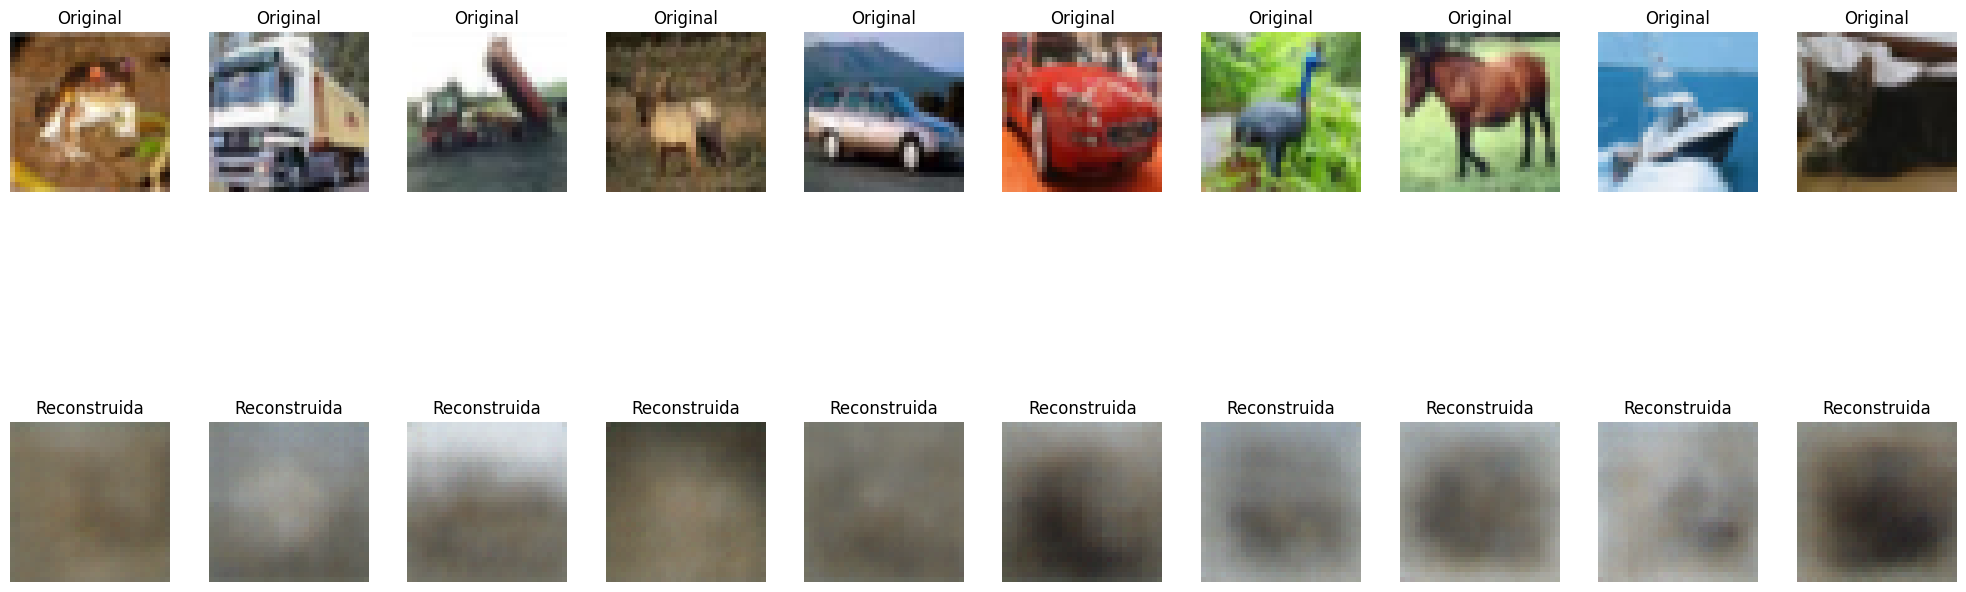

In [ ]:
import matplotlib.pyplot as plt

n = 10
images = cifar_images[:n]

# Obtener la representación latente z y las reconstrucciones
z_mean, z_log_var, z = vae3.encoder.predict(images)
predictions = vae3.decoder.predict(z)

plt.figure(figsize=(20, 6))

for i in range(n):
    # Imagen original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(images[i])
    plt.title("Original")
    plt.axis("off")

    # Reconstrucción
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(predictions[i])
    plt.title("Reconstruida")
    plt.axis("off")

plt.tight_layout()
plt.show()
